In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

display(nba_2010.head())
display(nba_2014.head())

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


### Analyzing reationships between Quant and Categorical

mean difference in the knicks points and the nets points in 2010: 9.731707317073173


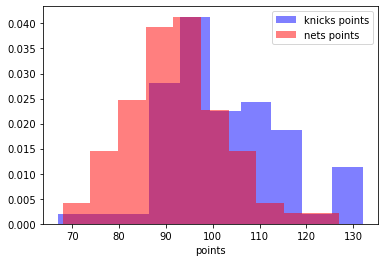

mean difference in the knicks points and the nets points in 2014: 0.44706798131809933


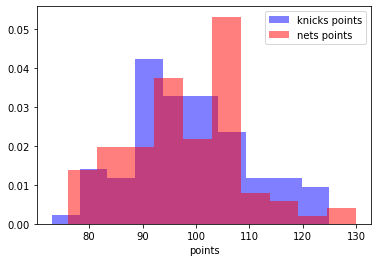

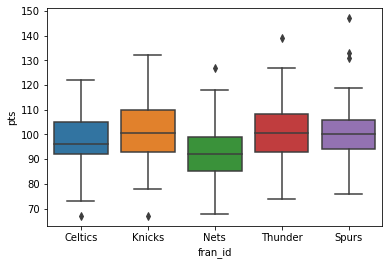

In [ ]:

knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']

diff_means_2010 = abs(np.mean(knicks_pts) - np.mean(nets_pts))
print('mean difference in the knicks points and the nets points in 2010:',diff_means_2010)

plt.hist(knicks_pts, color = 'blue', alpha = 0.5, density = True, label = 'knicks points')
plt.hist(nets_pts, color = 'red', alpha = 0.5, density = True, label = 'nets points')
plt.xlabel('points')
plt.legend()
plt.show()

knicks_pts = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts = nba_2014.pts[nba_2014.fran_id == 'Nets']

diff_means_2014 = abs(np.mean(knicks_pts) - np.mean(nets_pts))
print('mean difference in the knicks points and the nets points in 2014:',diff_means_2014)

plt.clf()
plt.hist(knicks_pts, color = 'blue', alpha = 0.5, density = True, label = 'knicks points')
plt.hist(nets_pts, color = 'red', alpha = 0.5, density = True, label = 'nets points')
plt.xlabel('points')
plt.legend()
plt.show()

plt.clf()
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

#### Inference
we see a mean difference between the knicks and nets of about 10 points in the year 2010 which tells us that theres a significant association between the points of both teams and as of 2014, the mean differnece dropped to less than 1 which tells us that there was less of an association. The histogram further goes to show us the significance of association in both years 

### Analyzing relationships between Categorical variables

In [ ]:

location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print('Frequncy of game location and result:',location_result_freq)

location_result_proportions = location_result_freq/len(nba_2010)
print('\nProportion of game loaction and result:',location_result_proportions)

chi2,pval,_,expected = chi2_contingency(location_result_freq)
print('\nexpected contingency table:', expected)
print('\nchi-square statistic:', chi2)
print('\np_value:',pval)
print('This means theres a statistical significance between the game results and game location')

Frequncy of game location and result: game_location    A    H
game_result            
L              133  105
W               92  120

Proportion of game loaction and result: game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667

expected contingency table: [[119. 119.]
 [106. 106.]]

chi-square statistic: 6.501704455367053

p_value: 0.010777112875193886
This means theres a statistical significance between the game results and game location


#### Inference
From the table of proportion between game location and game result, we see that 30% of teams(Knicks and nets) who played away lost, their matches and 26% of teams who played at Home, won their matches. The p_value and chi-square statistic further goes to tell us that this occurance **did not** happen at random chance and is as a result of a statistical difference.

### Analyzing Relationships Between Quantitative Variables

[[  0.05   1.37]
 [  1.37 186.56]]
covariance: 1.37
correlation: 0.4402088708468084


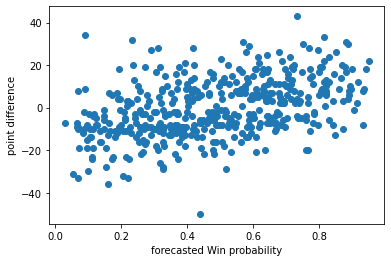

In [ ]:

covariance = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(covariance)
cov = 1.37
print('covariance:', cov)
correlation, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print('correlation:', correlation)

plt.clf()
plt.scatter(nba_2010.forecast, nba_2010.point_diff)
plt.xlabel('forecasted Win probability')
plt.ylabel('point difference')
plt.show()

#### Inference
The covariance between the forecasted win probability and the point difference is 1.37 and the correlation value is 0.44. which tells us that theres a slight linear correlation between both variables.